In [1]:
import pandas as pd
from item_builder import build_items
from itertools import groupby
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import glob
from constants import currency_shards

import plotly.express as px

from fractions import Fraction
import math
from ninja import currencyreport,refine_report
from currency_conversion import conversion
from constants import hard_currency,price_in
%matplotlib inline
%load_ext autoreload
%autoreload 2



In [2]:
items=build_items()
items = [item for item in items if  item.stashtab=='appraisal']
cr=currencyreport()
now=datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%s')
cr.to_csv(f'currency_reports/{now}.csv')
cr=refine_report(cr)
cr=cr.set_index('get_currency')
cr=cr[cr['receive']==False]


https://poe.ninja/api/data/currencyoverview Fragment 200
https://poe.ninja/api/data/currencyoverview Currency 200
https://poe.ninja/api/data/itemoverview Scarab 200
https://poe.ninja/api/data/itemoverview Oil 200
https://poe.ninja/api/data/itemoverview Fossil 200
https://poe.ninja/api/data/itemoverview Resonator 200
https://poe.ninja/api/data/itemoverview Prophecy 200
https://poe.ninja/api/data/itemoverview Incubator 200
https://poe.ninja/api/data/itemoverview UniqueMap 200
https://poe.ninja/api/data/itemoverview UniqueJewel 200
https://poe.ninja/api/data/itemoverview UniqueFlask 200
https://poe.ninja/api/data/itemoverview UniqueArmour 200
https://poe.ninja/api/data/itemoverview UniqueWeapon 200
https://poe.ninja/api/data/itemoverview UniqueAccessory 200
https://poe.ninja/api/data/itemoverview Essence 200
https://poe.ninja/api/data/itemoverview DeliriumOrb 200
https://poe.ninja/api/data/itemoverview DivinationCard 200
https://poe.ninja/api/data/itemoverview Map 200
https://poe.ninja/ap

In [3]:
items

[kwargs_dataclass.<locals>.Als(inventoryId='Stash11', typeLine='Mysterious Invaders', x=0, y=8, league='Ultimatum', stashtab='appraisal', stackSize=1, price=1.0, type='Prophecy', name='', sockets=(), properties={}),
 kwargs_dataclass.<locals>.Als(inventoryId='Stash11', typeLine='The Lost Maps', x=0, y=2, league='Ultimatum', stashtab='appraisal', stackSize=1, price=1.0, type='Prophecy', name='', sockets=(), properties={}),
 kwargs_dataclass.<locals>.Als(inventoryId='Stash11', typeLine='The Mysterious Gift', x=0, y=10, league='Ultimatum', stashtab='appraisal', stackSize=1, price=1.0, type='Prophecy', name='', sockets=(), properties={}),
 kwargs_dataclass.<locals>.Als(inventoryId='Stash11', typeLine='A Regal Death', x=1, y=0, league='Ultimatum', stashtab='appraisal', stackSize=1, price=1.0, type='Prophecy', name='', sockets=(), properties={}),
 kwargs_dataclass.<locals>.Als(inventoryId='Stash11', typeLine='Risen Blood', x=0, y=9, league='Ultimatum', stashtab='appraisal', stackSize=1, pric

In [4]:
df=pd.DataFrame([dict(chaos_value=item.value,type=item.type,type_line=item.type_line,price=item.price,shoplink_template=item.shoplink_template,stack_size=item.stack_size) for item in items])
df.loc[df.type_line.isin(hard_currency),'type']='Hard Currency'
df.loc[df.type_line=='Chaos Orb','chaos_value']=df.loc[df.type_line=='Chaos Orb','stack_size']
inventory=df[~df['type'].isin([None])&(df.chaos_value>0)]
worthless=df[(df.chaos_value==0)&df.type.str.contains('Uniq')]

print(worthless['type_line'])

Series([], Name: type_line, dtype: object)


In [5]:
notcurrency=inventory.groupby('type').sum().sort_values(ascending=False,by='chaos_value')
currency=inventory[inventory.type=='Currency'].groupby('type_line').sum()['chaos_value'].reset_index()
currency.loc[currency.chaos_value<5,'type_line']='other'
currency=currency.groupby('type_line').sum().sort_values(ascending=False,by='chaos_value')
total_on_offer=inventory[~inventory.type.isin(['Currency','Hard Currency'])]

In [6]:
total_on_offer.sample(10)

,chaos_value,type,type_line,price,shoplink_template,stack_size
9,0.96,Prophecy,Golden Touch,0.96,"[linkItem location=""Stash11"" league=""Ultimatum...",1
36,7.00,Prophecy,Twice Enchanted,7.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1
43,1.00,Prophecy,The Sharpened Blade,1.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1
54,1.00,Prophecy,The Scout,1.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1
23,1.00,Prophecy,The Lost Maps,1.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1
34,2.00,Prophecy,The Beautiful Guide,2.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1
45,2.00,Prophecy,Bountiful Traps,2.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1
52,1.00,Prophecy,Hidden Reinforcements,1.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1
19,1.00,Prophecy,The Feral Lord I,1.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1
56,1.00,Prophecy,The Feral Lord I,1.00,"[linkItem location=""Stash11"" league=""Ultimatum...",1


In [7]:
total_on_offer.groupby('type').sum().sort_values(ascending=False,by='chaos_value')

,chaos_value,price,stack_size
type,,,
Prophecy,74.3,74.3,57


In [8]:
total_on_offer.sample(10)

,chaos_value,type,type_line,price,shoplink_template,stack_size
45,2.0,Prophecy,Bountiful Traps,2.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
55,7.0,Prophecy,Twice Enchanted,7.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
43,1.0,Prophecy,The Sharpened Blade,1.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
2,1.0,Prophecy,The Mysterious Gift,1.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
12,1.0,Prophecy,The Brothers of Necromancy,1.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
13,1.0,Prophecy,The Feral Lord I,1.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
56,1.0,Prophecy,The Feral Lord I,1.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
29,1.0,Prophecy,Rebirth,1.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
19,1.0,Prophecy,The Feral Lord I,1.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1
8,1.0,Prophecy,"Soil, Worms and Blood",1.0,"[linkItem location=""Stash11"" league=""Ultimatum...",1


In [9]:
total_on_offer.groupby('type').sum().sort_values(ascending=False,by='chaos_value')

,chaos_value,price,stack_size
type,,,
Prophecy,74.3,74.3,57


Liquidating a total of 74.3
Currency makes up 0.0


/Users/swozny/work/poe/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


IndexError: index 0 is out of bounds for axis 0 with size 0

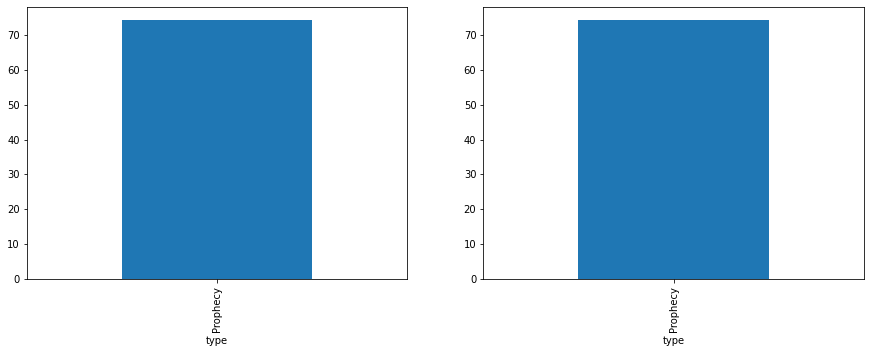

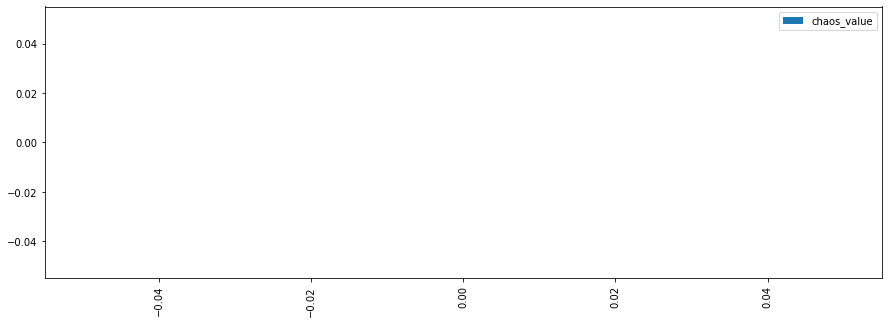

In [10]:
print(f"Liquidating a total of {total_on_offer.sum()['chaos_value']}")
print(f"Currency makes up {currency.sum()['chaos_value']}")


fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(15,5))
_=notcurrency['chaos_value'].plot(kind='bar',ax=ax1)
_=total_on_offer.groupby('type').sum().sort_values(ascending=False,by='chaos_value')['chaos_value'].plot(kind='bar',ax=ax2)

# _=notcurrency.plot.pie(y='chaos_value',labels=notcurrency.type,autopct='%.2f',legend=False,ax=ax2)
_=currency.plot(kind='bar',figsize=(15,5))

In [ ]:
cr['value']['Chaos Orb']=1
exchange=cr['value']

In [ ]:
register = inventory.apply(lambda x:pd.concat([x, x.chaos_value/exchange],axis=0),axis=1).set_index(['chaos_value','type','type_line','price','shoplink_template','stack_size'])
register=register.stack().reset_index()
register.columns = ['chaos_value','type','type_line','chaos_price','shoplink_template','stack_size','fx','value_fx']
register=register[(register.chaos_value/register.stack_size)>0.75]

In [ ]:
register=register[register.fx=='Chaos Orb']

In [ ]:
weak_currency = ['Orb of Alteration','Orb of Alchemy']
register['up_priced_value_fx']=register.apply(lambda self: math.ceil(self.value_fx*1.1) if self.fx in weak_currency else math.ceil(self.value_fx),axis=1)
register['final_price']=register.apply(lambda self: Fraction(self.up_priced_value_fx/self.stack_size).limit_denominator(self.stack_size),axis=1)
register['offered_value_chaos']=register.apply(lambda self: float(self.final_price)*exchange[self.fx]*self.stack_size,axis=1)
register['fx_id']=register.fx.map(conversion)
register['difference_fx']=register.offered_value_chaos- register.chaos_value

In [ ]:
register=register[(register.difference_fx/register.chaos_value)<0.1]
columns_to_drop_for_visibility=['shoplink_template','up_priced_value_fx','value_fx']


In [ ]:
preview = register.drop(columns_to_drop_for_visibility,axis=1)
preview.sort_values('difference_fx').tail(10)

In [ ]:
_register = register[register['type']!='Hard Currency']
# _register = _register[_register['type_line']!='Stacked Deck']
_register=_register[_register.final_price>10]
_register = _register[_register['type_line']!='Lathi']
_register=_register[~_register.type_line.isin(currency_shards)]
content= list(_register.apply(lambda row: row.shoplink_template.format(**row),axis=1))


In [ ]:
assert len(str(content))< 150_000
len(str(content))

In [ ]:
print("Liquidizing")
df['datetime']=datetime.datetime.now()
df.to_csv(f'reports/{now}.csv')

In [ ]:

dfs=pd.concat([pd.read_csv(file_type_line) for file_type_line in glob.glob('reports/*.csv')])
#dfs[
hc=dfs.type_line.isin(['Orb of Alteration','Orb of Alchemy','Chaos Orb','Vaal Orb','Divine Orb','Exalted Orb','Mirror Shard','Stacked Deck','Mirror of Kalandra'])
dfs.loc[hc,'type']='Hard Currency'
dfs[dfs.type=='Hard Currency'].sort_values('datetime').tail(10)


In [ ]:

_dfs=dfs.groupby(['type','datetime']).sum().reset_index().sort_values('type')
fig = px.area(_dfs.reset_index(), x="datetime", y="chaos_value", color="type",category_orders={'Hard Currency':1,'Currency':0})
fig.show()
_dfs.head()

In [ ]:
from forum_updater import update_forum
l=len(content)
print(len(str(content)))
assert len(str(content))<49_999

In [ ]:
_content=[content]#,content[int(l/3):int(2*l/3)],content[int(2*l/3):]]
# update_forum("\n".join(_content[0]),'3096135')
update_forum('asd','3096135')

In [ ]:
from constants import currency_shards
from collections import ChainMap
buying_scarabs = {
    'Gilded Reliquary Scarab':(10,'Chaos Orb'),
        'Gilded Ambush Scarab':(5,'Chaos Orb'),

}
included = [
    buying_scarabs,
#     currency_shards,
]
purchase_orders=dict(ChainMap(*[buying_scarabs]))

In [ ]:
df2=pd.DataFrame(purchase_orders).T.reset_index().set_index([1])
df2=df2.join(cr['value']).set_index('index').apply(np.prod,axis=1).reset_index()
df2.columns=['type_line','Chaos Orb']
# df2 = df2.apply(lambda x:pd.concat([x, x['Chaos Orb']/exchange],axis=0),axis=1).set_index(['type_line'])
df2=df2.set_index(['type_line'])
df2.head()

In [ ]:
df3=df2.T.unstack(1).reset_index()
df3.columns=['fx','type_line','price_fx']

buy_in = hard_currency

df3=df3.set_index('type_line').join(df[df.type_line.isin(buy_in)].set_index('type_line')[['stack_size','shoplink_template']]).reset_index()
df3=df3.groupby(['type_line','fx']).first().reset_index()
df3['price_fractional']=(df3['price_fx']).apply(lambda x: (Fraction(x)).limit_denominator(2))
df3=df3[df3.apply(lambda x: x['price_fractional'].numerator<x.stack_size,axis=1)]
df3['diff_fx']=df3['price_fractional']-df3['price_fx']
# df3=df3[(df3.diff_fx<0)&(df3['price_fractional']>0)]
df3['fx_id']=df3['fx'].str.split().str.join('-').str.lower()
df3['final_price']=1/df3['price_fractional']
df3['shoplink_template']=df3['shoplink_template'].str.replace('~b/o','~price')
df3.head(50)

In [ ]:
buying_content= sorted(list(df3.apply(lambda row: row.shoplink_template.format(**row),axis=1)))
buying_content

In [ ]:
upload="\r\n".join(buying_content)
print(upload)

In [ ]:
# update_forum(upload,'2843594')
normal_content="\n".join(_content[0])
update_forum(f'{upload}','3096135')

In [ ]:
print(f'{normal_content}\n{upload}')